In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot  as plt


In [12]:
gno_phno = '/Users/stearb/desktop/R03_local/impc_ftp/genotype-phenotype-assertions-ALL.csv'

pd.options.display.max_columns = None
cols_to_drop = ['phenotyping_center','colony_id','sex','zygosity','strain_name','project_name',
                'project_fullname','pipeline_name','pipeline_stable_id','procedure_stable_id',
                'parameter_stable_id','p_value','percentage_change','effect_size','statistical_method',
                   'resource_name','strain_accession_id','allele_name','procedure_name','marker_accession_id',
               'allele_symbol']

df=pd.read_csv(gno_phno).drop(cols_to_drop,axis=1)

df = df[df['marker_symbol'].notna()]

In [13]:
df

,marker_symbol,allele_accession_id,parameter_name,top_level_mp_term_id,top_level_mp_term_name,mp_term_id,mp_term_name
0,Gimap3,MGI:5883410,Cornea,MP:0005391,vision/eye phenotype,MP:0001312,abnormal cornea morphology
1,Prss8,MGI:5646004,Embryo Size,"MP:0005380,MP:0005378","embryo phenotype,growth/size/body region pheno...",MP:0001697,abnormal embryo size
2,Pstpip2,MGI:5755044,Seminal vesicle,"MP:0005389,MP:0005379","reproductive system phenotype,endocrine/exocri...",MP:0002059,abnormal seminal vesicle morphology
3,Ap4e1,MGI:5548434,Response amplitude - S,MP:0005386,behavior/neurological phenotype,MP:0001486,abnormal startle reflex
4,S100a14,MGI:5513816,Monocyte differential count,"MP:0005387,MP:0005397","immune system phenotype,hematopoietic system p...",MP:0012441,abnormal monocyte cell number
...,...,...,...,...,...,...,...
60169,Rtl10,MGI:5825309,HRV,MP:0005385,cardiovascular system phenotype,MP:0003928,increased heart rate variability
60170,Abi2,MGI:5760383,Periphery resting time,MP:0005386,behavior/neurological phenotype,MP:0003313,abnormal locomotor activation
60171,Brwd1,MGI:6156470,Seminal vesicle,"MP:0005389,MP:0005379","reproductive system phenotype,endocrine/exocri...",MP:0002059,abnormal seminal vesicle morphology
60172,Mecom,MGI:2158381,Fat/Body weight,MP:0005375,adipose tissue phenotype,MP:0010024,increased total body fat amount


In [14]:
# Filter dataset by selecting for specific terms in the mp columns
top='top_level_mp_term_name'
mp_term='mp_term_name'
q1='heart'
q2='structural|birth defect|congenital'

mask = df[[top,mp_term]].apply(lambda x: x.str.contains(q1,regex=True,flags=re.IGNORECASE)).any(axis=1)
heart = df[mask]

In [16]:
from collections import Counter
x=dict(Counter(df['marker_symbol'].values))

allele_freq = {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}

Text(0.5, 1.0, 'Genes with the most Allele Entries in IMPC')

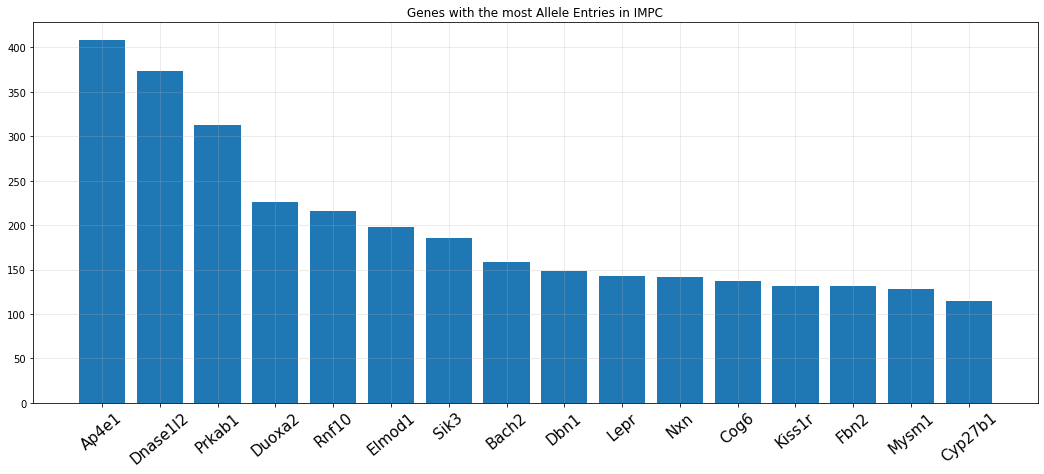

In [17]:
n=16
keys = list(allele_freq.keys())[:n]
values = list(allele_freq.values())[:n]
plt.figure(figsize=(18,7))
plt.bar(keys, values)
plt.xticks(fontsize=15,rotation=40)
plt.grid(alpha=.3)
plt.title('Genes with the most Allele Entries in IMPC')

In [18]:
heart[['marker_symbol','parameter_name','allele_accession_id',
       'mp_term_id','mp_term_name','top_level_mp_term_id']].to_csv('geno2pheno_mapping.csv')

In [19]:
df[['marker_symbol','parameter_name','allele_accession_id',
       'mp_term_id','mp_term_name','top_level_mp_term_id']].to_csv('geno2pheno_mapping.csv')

In [20]:
heart

,marker_symbol,allele_accession_id,parameter_name,top_level_mp_term_id,top_level_mp_term_name,mp_term_id,mp_term_name
9,Pdp1,MGI:6152612,Heart weight,"MP:0005385,MP:0005378","cardiovascular system phenotype,growth/size/bo...",MP:0002833,increased heart weight
50,Duox2,MGI:6277071,Heart weight,MP:0005385,cardiovascular system phenotype,MP:0004857,abnormal heart weight
79,Csnk2a2,MGI:6277015,Heart,MP:0005385,cardiovascular system phenotype,MP:0000266,abnormal heart morphology
80,Exd1,MGI:6120806,Heart weight,MP:0005385,cardiovascular system phenotype,MP:0004857,abnormal heart weight
103,Ampd1,MGI:5548917,Heart Morphology,MP:0005385,cardiovascular system phenotype,MP:0000266,abnormal heart morphology
...,...,...,...,...,...,...,...
60118,Ffar1,MGI:5695958,Heart,"MP:0005385,MP:0005378","cardiovascular system phenotype,growth/size/bo...",MP:0000274,enlarged heart
60143,Cnnm2,MGI:5692792,Heart,MP:0005385,cardiovascular system phenotype,MP:0000266,abnormal heart morphology
60147,Ppp2r5c,MGI:6277066,Heart weight,"MP:0005385,MP:0005378","cardiovascular system phenotype,growth/size/bo...",MP:0002833,increased heart weight
60153,2610507B11Rik,MGI:6203636,Heart weight,"MP:0005385,MP:0005378","cardiovascular system phenotype,growth/size/bo...",MP:0002833,increased heart weight


In [22]:
df.dropna(inplace=True)

In [28]:
# Seperate the 'top_level_mp_term_id'  column by '|'
all_top_level_mp_terms = np.ravel(list(df['top_level_mp_term_id'].apply(lambda x: x.split('|')).values))

In [29]:
# Split results by ','
all_top_level_mp_terms_ = list([i.split(',') for i in all_top_level_mp_terms])

# Flatten it.
flat_list = [item for sublist in all_top_level_mp_terms_ for item in sublist]

In [37]:
print('There are '+str(len(np.unique(flat_list))) + ' unique top level MP terms in this dataset.')

There are 24 unique top level MP terms in this dataset.


In [39]:
print('There are '+str(len(df['mp_term_id'].unique()))+' unique MP terms in this dataset.')

There are 740 unique MP terms in this  dataset.
